In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Estimación de Métricas de Dependencia

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

Grafique las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

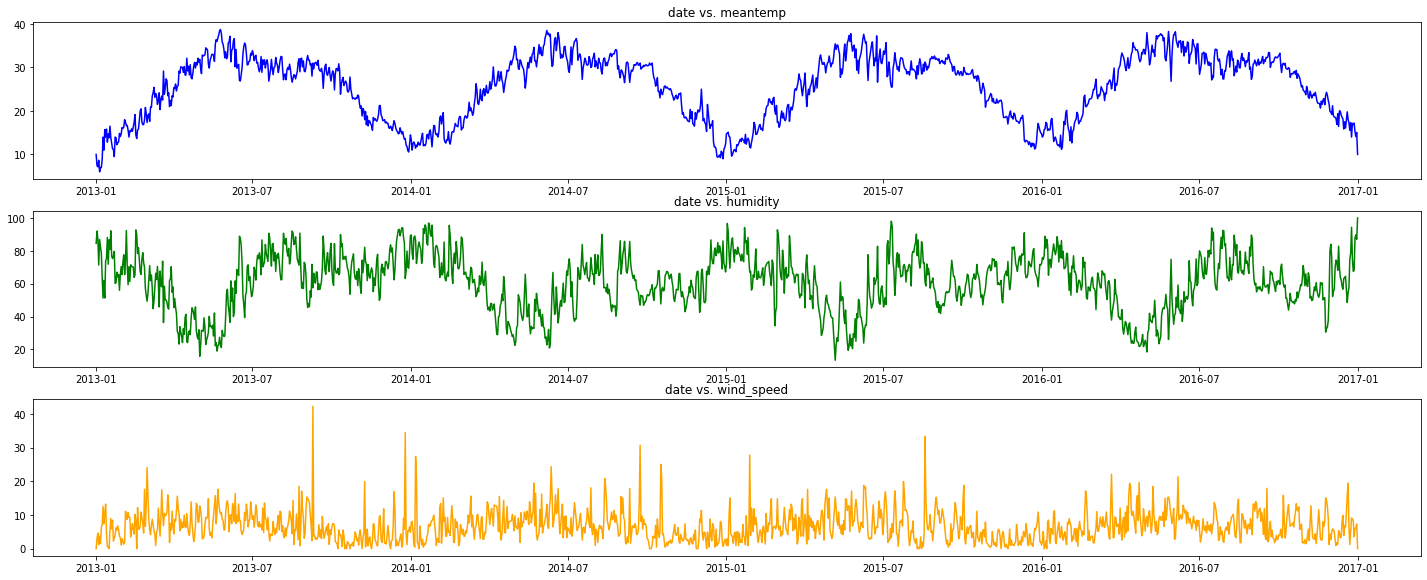

In [4]:
# Se extrae el nombre de las características que componen el dataset
nombresCaracteristicas = df.columns[0:4]
# print(nombresCaracteristicas)
colores = ['blue','green','orange']

#define subplots
fig, ax = plt.subplots(3, 1, figsize=(20,8))
fig.tight_layout()

# Graficos
for i in range(1,len(nombresCaracteristicas)):  
  ax[i-1].plot(df.loc[:,nombresCaracteristicas[0]], df.loc[:,nombresCaracteristicas[i]], color = colores[i-1])
  nombreGrafico = f"{nombresCaracteristicas[0]} vs. {nombresCaracteristicas[i]}"
  ax[i-1].title.set_text(nombreGrafico)

## Asignación 2 &#x1F625;

Grafique el histograma, calcule la media, imprimala y grafíquela en el histograma para las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

[25.49552066 25.49552066 25.49552066]


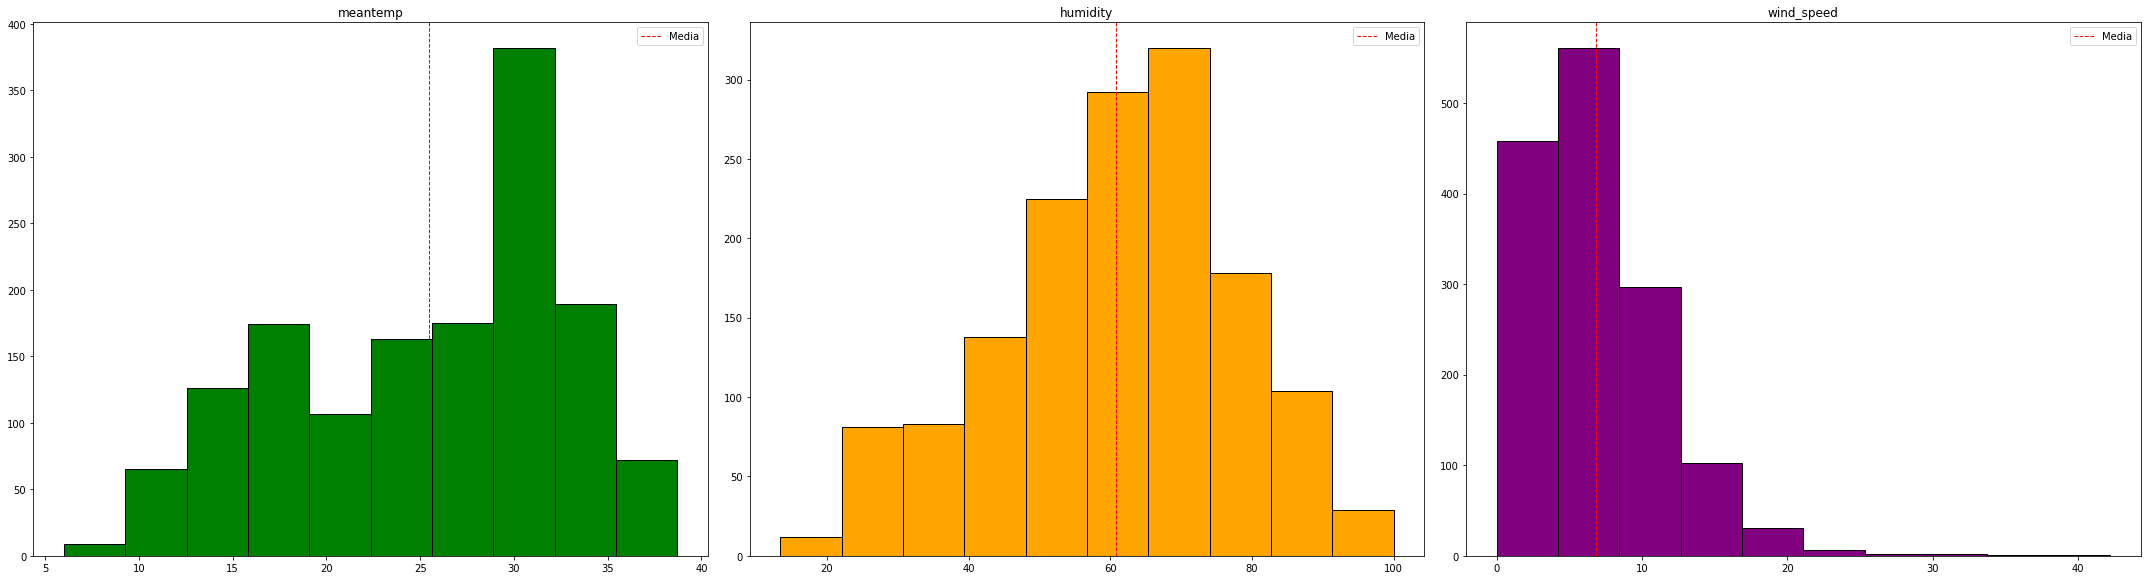

In [5]:
# Calculo de las medias
medias = []
for i in range(1,4):
  datos = df.iloc[:,1]
  media = sum(datos)/len(datos)
  medias.append(media)

medias = np.array(medias)
print(medias)

# Se extrae el nombre de las características que componen el dataset
nombresCaracteristicas = df.columns
# print(nombresCaracteristicas)
colores = ['blue','green','orange','purple','pink']

#define subplots
fig, ax = plt.subplots(1, 3, figsize=(30,8))
fig.tight_layout()

# Graficos
for i in range(1,4):  
  ax[i-1].hist(df.loc[:,nombresCaracteristicas[i]], color=colores[i], edgecolor='k')
  nombreGrafico = nombresCaracteristicas[i]
  ax[i-1].title.set_text(nombreGrafico)
  media = (np.sum(df[nombresCaracteristicas[i]]))/len(df[nombresCaracteristicas[i]])
  ax[i-1].axvline(media, color='red', linestyle='dashed', linewidth=1, label = "Media")
  ax[i-1].legend()
  

## Asignación 3 &#x1F625;

Implemente las función de crossvariance descrita debajo

In [6]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    # Convertimos la serie a un numoy array
    time_series_1 = np.array(time_series_1)
    time_series_2 = np.array(time_series_2)

    # Calculo de la media
    meanTS1 = (np.sum(time_series_1))/len(time_series_1)
    meanTS2 = (np.sum(time_series_2))/len(time_series_2)

    # Calculo de la covarianza a partir del lag(s) dado(s)
    if isinstance(lags, int):
      #if lags<=0:
      #  lags = lags * (-1)
      covarianzas = 0
      for i in range(len(time_series_1)-lags):
        covarianzas = covarianzas + ((time_series_1[i+lags] - meanTS1)*(time_series_2[i] - meanTS2))
      covarianzas = covarianzas / (len(time_series_1)-lags)
    else:
      # Lista de resultados de la funcion de covarianza cruzada
      lags = np.array(lags)
      covarianzas = []
      for lag in lags:
        #Diferencia de los valores de la ST menos su media
        covarianza = 0
        for i in range(len(time_series_1)-lag):
          covarianza = covarianza + ((time_series_1[i+lag] - meanTS1)*(time_series_2[i] - meanTS2))
        covarianza = covarianza / (len(time_series_1)-lag)
        covarianzas.append(covarianza)

    return covarianzas

In [7]:
for __ts__ in ["meantemp", "humidity", "wind_speed"]:
    __cvars__ = crossvariance(df[__ts__], df[__ts__], 0)
    #print(__cvars__)
    #print(df[__ts__].var(ddof=0))
    
    if __cvars__ is not None:
        assert np.isclose(__cvars__, df[__ts__].var(ddof=0)), "Your function has an error"

__cvars__ = crossvariance(df["humidity"], df["wind_speed"], np.arange(5).tolist())
#print(__cvars__)
__expected_cvars__ = [-28.58795012, -24.37189775, -21.10904889, -19.62116432, -17.42504231] 

if __cvars__ is not None:
    assert np.allclose(__cvars__, __expected_cvars__), "Your function has an error"

## Asignación 4 &#x1F921;

Implemente las función de crosscorrelation.

In [8]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
):
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance.
    
    Entradas:
            
    Salidas:
    """
    
    # CÓDIGO AQUI
    if type(lags) == int:
        crossCorr = crossvariance(time_series_1,time_series_2,lags) / ((crossvariance(time_series_1,time_series_1,0) * crossvariance(time_series_2,time_series_2,0))**0.5)
    else:
      crossCorr = []
      for lag in lags:
        crossCorr.append(crossvariance(time_series_1,time_series_2,lag) / ((crossvariance(time_series_1,time_series_1,0) * crossvariance(time_series_2,time_series_2,0))**0.5))

    return crossCorr

## Asignación 5 &#x1F643;

Grafique el correlograma de la autocorrelación de la serie de tiempo __wind_speed__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlaciones de interés).

In [9]:
# Aplicamos autocorrelacion a la serie de tiempo
# La autocorrelacion, a diferencia de la correlacion cruzada, se aplica sobre la misma serie de tiempo en lugar de comparar tiempos y series diferentes
#lags = list(range(len(df['wind_speed'])))
lags = list(range(21))
valoresCorrelacion = crosscorrelation(df['wind_speed'], df['wind_speed'], lags)
std = 1/(len(df['wind_speed'])**0.5)


# Lo siguiente solo es para verificar que la desviacion estandar coincide con el valor arrojado por la funcion creada para el calculo de la covarianza
# columna = np.array(valoresCorrelacion)
# print(std)
# print(np.std(columna))
#print(type(valoresCorrelacion))

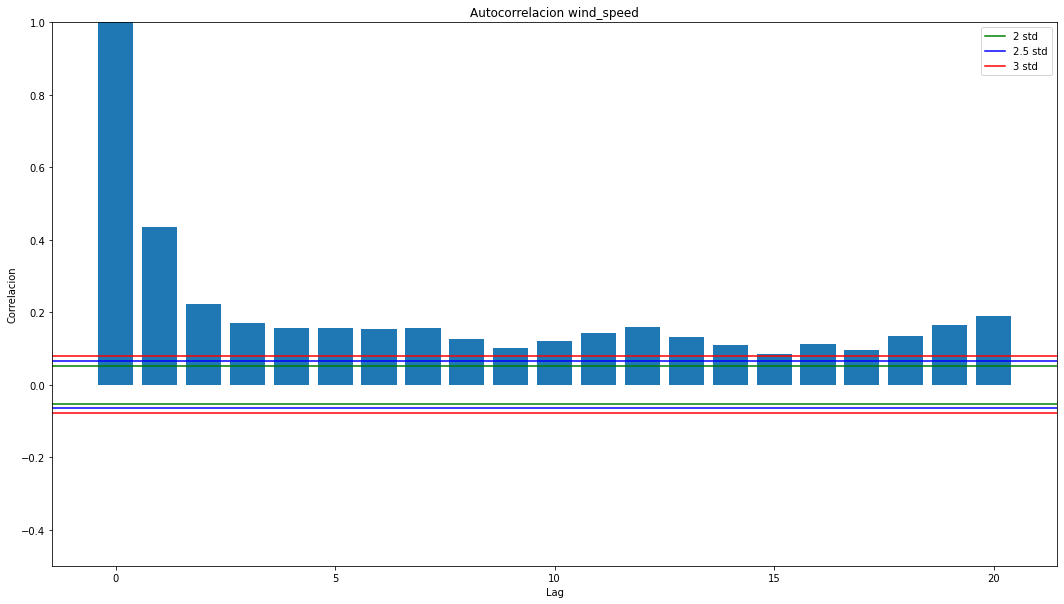

In [10]:
# Grafica del correlograma 
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_ylim(-0.5,1.0)

# Agregamos el titulo al histograma
ax.set_title("Autocorrelacion wind_speed")
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Correlacion')
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Lag')

#Creamos la grafica de barras utilizando los Lags como eje X y las Correlaciones como eje y.
plt.bar(lags, valoresCorrelacion)

# Agregamos las lineas de las desviaciones estandar
plt.axhline(y=2*std, color="g", label = "2 std")
plt.axhline(y=2.5*std, color="b", label = "2.5 std")
plt.axhline(y=3*std, color="r", label = "3 std")
plt.axhline(y=-2*std, color="g")
plt.axhline(y=-2.5*std, color="b")
plt.axhline(y=-3*std, color="r")

# Mostramos la grafica con el metodo show()
ax.legend()
plt.show()

## Asignación 6 &#x1F643;

Grafique el correlograma de la correlación cruzada de la serie de tiempo __wind_speed__ y __humidity__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlación de interés).

In [11]:
# Correlacion cruzada
# La correlacion cruzada, se aplica sobre tiempos y series diferentes
#lags = list(range(len(df['wind_speed'])))
lags = list(range(21))
valoresCorrelacion = crosscorrelation(df['wind_speed'], df['humidity'], lags)
# std = (crossvariance(valoresCorrelacion, valoresCorrelacion, 0))**0.5
std = 1/(len(df['wind_speed'])**0.5)

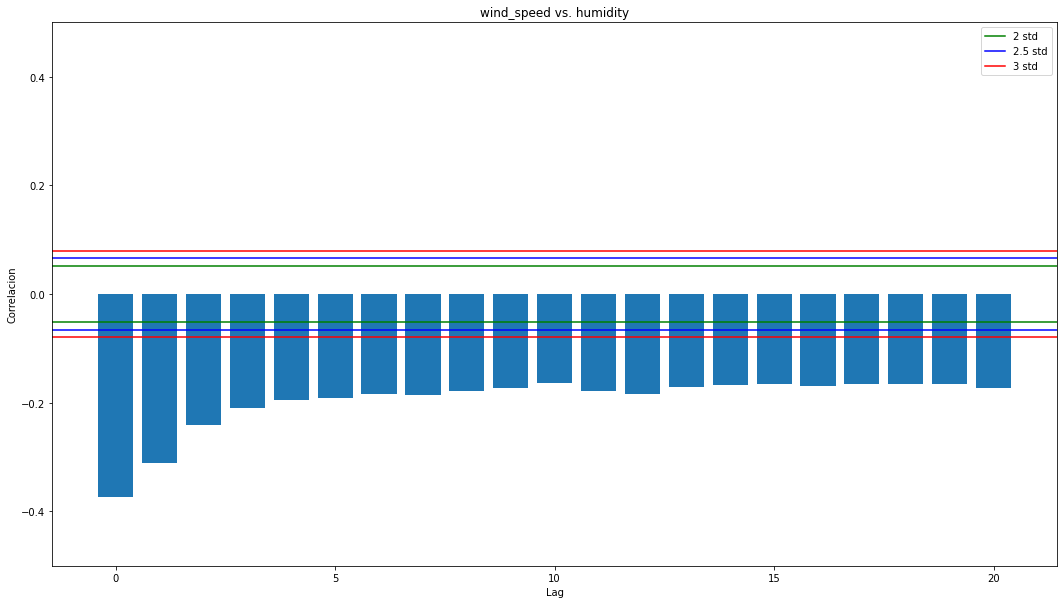

In [12]:
# Grafica del correlograma 
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_ylim(-0.5,0.5)

# Titulo
ax.set_title("wind_speed vs. humidity")
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Correlacion')
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Lag')

#Creamos la grafica de barras utilizando los Lags como eje X y las Correlaciones como eje y.
plt.bar(lags, valoresCorrelacion)

# Agregamos las lineas de las desviaciones estandar
plt.axhline(y=2*std, color="g", label = "2 std")
plt.axhline(y=2.5*std, color="b", label = "2.5 std")
plt.axhline(y=3*std, color="r", label = "3 std")
plt.axhline(y=-2*std, color="g")
plt.axhline(y=-2.5*std, color="b")
plt.axhline(y=-3*std, color="r")

#Finalmente mostramos la grafica con el metodo show()
ax.legend()
plt.show()

## Integrity Tests

In [13]:
import hashlib

cell_signs = [
    "b133c1b74dff90eff20627c4b853c23441652b2d"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

Something was modified...
b133c1b74dff90eff20627c4b853c23441652b2d


In [14]:
content = _ih[-2]

program_sign = "f8ca458c26e5eddbdfe6e06004c808b25a7634ca"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
